<a href="https://colab.research.google.com/github/ANS1514/Projects_in_AI-ML/blob/main/hw4_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_md")

def get_embedding(word):
    token = nlp.vocab[word]
    if token.has_vector and np.any(token.vector):
        return token.vector
    else:
        print(f"Word '{word}' is out-of-vocabulary (OOV).")
        return None

word1 = input("Enter the first word: ")
word2 = input("Enter the second word: ")

embedding1 = get_embedding(word1)
embedding2 = get_embedding(word2)

if embedding1 is not None:
    print(f"Embedding for '{word1}':\n", embedding1)
if embedding2 is not None:
    print(f"Embedding for '{word2}':\n", embedding2)


Embedding for 'dog':
 [-0.72483    0.42538    0.025489  -0.39807    0.037463  -0.29811
 -0.28279    0.29333    0.57775    1.2205    -0.27903    0.80879
 -0.71291    0.045808  -0.46751    0.55944    0.42745    0.58238
  0.20854   -0.42718   -0.40284   -0.048941   0.1149    -0.6963
 -0.03338    0.052596  -0.22572   -0.35996    0.47961   -0.38386
 -0.73837    0.1718     0.52188    0.45584   -0.026621   0.48831
  0.67996   -0.73345   -0.27078    0.41739    0.1947     0.27389
 -0.70931   -0.45317   -0.22574   -0.12617    0.03268    0.142
  0.53923   -0.61285   -0.5322     0.19479    0.13889   -0.020284
  0.088162   0.85337    0.039407   0.11529   -0.42646    0.74832
  0.34421   -0.59462    0.0040537  0.027203  -0.063394   0.26538
  0.34757    0.21395   -0.39799   -0.027067  -0.36132    0.31979
  0.55813   -0.5652     0.55382    0.03928   -0.26933   -0.14705
  0.74032   -0.50566    0.023765   0.62273   -0.79388   -0.25165
  0.11992   -0.43056    1.0614     0.58571    0.8856    -0.056054
  0.

Cosine similarity between cat and dog: 1.0000001192092896
Cosine similarity between king and queen: 0.38253092765808105
Cosine similarity between table and apple: 0.16127167642116547


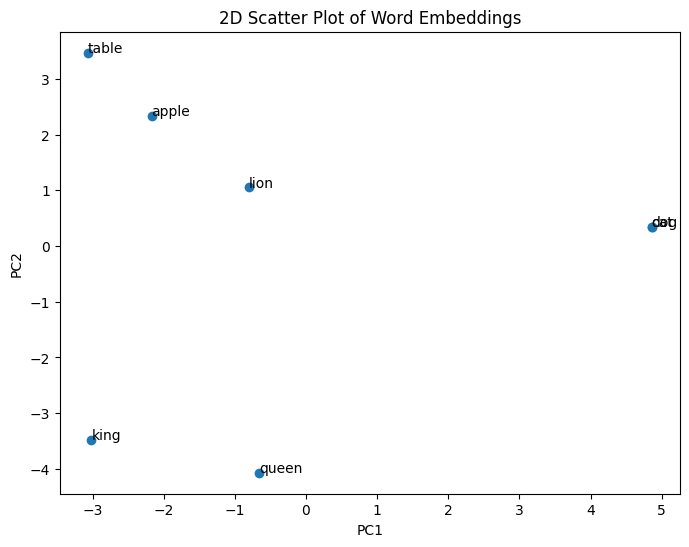

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def batch_cosine_similarity(word_pairs):
    similarities = []
    for w1, w2 in word_pairs:
        vec1 = get_embedding(w1)
        vec2 = get_embedding(w2)
        if vec1 is not None and vec2 is not None:
            sim = cosine_similarity(vec1, vec2)
            similarities.append(((w1, w2), sim))
        else:
            similarities.append(((w1, w2), None))
    return similarities

# Example usage
pairs = [("cat", "dog"), ("king", "queen"), ("table", "apple")]
results = batch_cosine_similarity(pairs)
for pair, sim in results:
    print(f"Cosine similarity between {pair[0]} and {pair[1]}: {sim}")

# Visualization: Scatter Plot of Word Embeddings
def plot_embeddings(words):
    embeddings = []
    valid_words = []
    for word in words:
        vec = get_embedding(word)
        if vec is not None:
            embeddings.append(vec)
            valid_words.append(word)
    embeddings = np.array(embeddings)

    # Reduce dimensions with PCA
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, word in enumerate(valid_words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.title("2D Scatter Plot of Word Embeddings")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# Plotting a sample set of words
plot_embeddings(["cat", "dog", "lion", "table", "apple", "king", "queen"])



Ranking words for target 'cat' using cosine metric:
dog: 1.0000001192092896
lion: 0.31077107787132263
tiger: 0.31077107787132263
car: 0.19304995238780975
table: 0.09271694719791412

Ranking words for target 'cat' using euclidean metric:
dog: 0.0
lion: 8.313392639160156
tiger: 8.313392639160156
car: 9.348939895629883
table: 9.396446228027344

Ranking words for target 'cat' using custom metric:
dog: -0.0
lion: 2.8649153239604175
tiger: 2.8649153239604175
car: 3.7720637469510194
table: 4.262618209627647


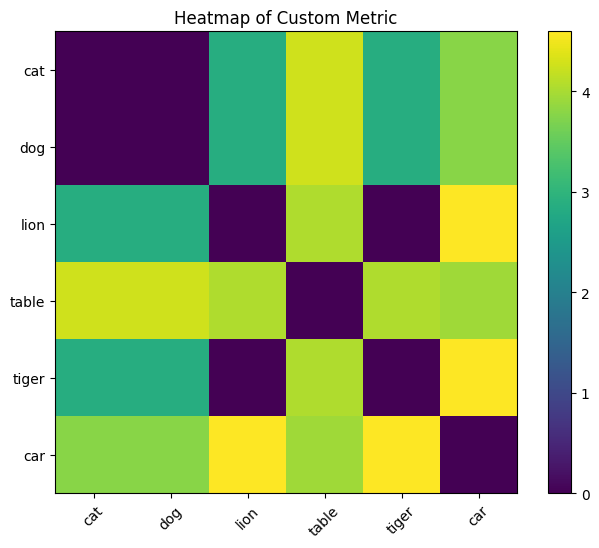

In [ ]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def custom_dissimilarity(vec1, vec2):
    cos_sim = cosine_similarity(vec1, vec2)
    euc_dist = euclidean_distance(vec1, vec2)
    # Scale cosine similarity
    factor = (1 - cos_sim) / 2
    return euc_dist * factor

def compute_similarity(word1, word2, metric='cosine'):
    vec1 = get_embedding(word1)
    vec2 = get_embedding(word2)
    if vec1 is None or vec2 is None:
        return None

    if metric == 'cosine':
        return cosine_similarity(vec1, vec2)
    elif metric == 'euclidean':
        return euclidean_distance(vec1, vec2)
    elif metric == 'custom':
        return custom_dissimilarity(vec1, vec2)
    else:
        raise ValueError("Invalid metric")

metrics = ['cosine', 'euclidean', 'custom']
target_word = "cat"
words_to_compare = ["dog", "lion", "table", "tiger", "car"]

for m in metrics:
    print(f"\nRanking words for target '{target_word}' using {m} metric:")
    scores = []
    for word in words_to_compare:
        score = compute_similarity(target_word, word, metric=m)
        scores.append((word, score))
    # Sort words based on score
    if m == 'cosine':
        ranked = sorted(scores, key=lambda x: x[1], reverse=True)
    else:
        ranked = sorted(scores, key=lambda x: x[1])
    for word, score in ranked:
        print(f"{word}: {score}")

# Heatmap of Similarity/Dissimilarity
def plot_heatmap(words, metric='cosine'):
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            vec1 = get_embedding(words[i])
            vec2 = get_embedding(words[j])
            if vec1 is not None and vec2 is not None:
                matrix[i, j] = compute_similarity(words[i], words[j], metric=metric)
            else:
                matrix[i, j] = np.nan

    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(ticks=range(n), labels=words, rotation=45)
    plt.yticks(ticks=range(n), labels=words)
    plt.title(f"Heatmap of {metric.capitalize()} Metric")
    plt.show()

# Plot heatmap for a sample list
plot_heatmap(["cat", "dog", "lion", "table", "tiger", "car"], metric='custom')
